<a href="https://colab.research.google.com/github/Nargis45/Ted_Talk_views_Prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ted Talk Views Prediction**

**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**

# **Dataset Information**


*   Number of instances: 4,005
*   Number of attributes: 19



# **Features information:**

**The dataset contains features like:**

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk

# **Target Variable :**



*  **views**: Count of views



#**Goal:**
* The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# **Project Work flow**

1. Importing Libraries

2. Loading the Dataset

3. EDA on features

4. Feature Engineering

5. Data Cleaning

6. Feature Selection

6. HyperParameter Tuning and Modeling

7. Evaluation and comparision of models

8. Selecting the best model

9. Conclusion

# **1. Importing Libraries**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Mounting the drive.**

In [2]:
#mounting the drive to import the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Loading the dataset**

In [3]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/Colab Notebooks/data_ted_talks.csv'
df=pd.read_csv(path)
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


**Now, we have loaded the dataset. So, let's start with Data Cleaning and EDA on features.**

# **3. Exploratory Data Analysis on features**

In [4]:
#shape of the dataset.
df.shape

(4005, 19)

In [5]:
#printing the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* **Here, we have talk_id, views, comments, duration as numerical columns in our dataset and rest all columns are either categorical or they contains textual data.**
* **So let's generate some numerical columns from these columns.**

In [6]:
#checking for duplicate rows in the dataset
df.duplicated().sum()

0

**The dataset do not contain any duplicate rows.**

## **Let's Check null values**

In [7]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

<Figure size 720x432 with 0 Axes>

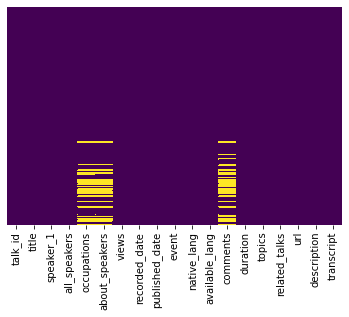

<Figure size 720x432 with 0 Axes>

In [8]:
#plotting the dataset using heatmap to see missing values.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.figure(figsize = (10, 6))

**The dataset contains NaN values in 4 columns:**

* all_speakers
* occupations
* about_speakers
* comments

In [9]:
#replacing Nan values of occupations column with 'other' 
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})
#applying  function on occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)
df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},{0: 'Other'},NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: 'Other'},NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: 'Other'},NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [10]:
#defining a new feature called occupation
df['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)
 
df.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,occupation
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",health activist
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},{0: 'Other'},NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",O
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,law researcher
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: 'Other'},NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",O
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: 'Other'},NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,O


In [11]:
#getting values of occupation other thn 'O'
df1=df[df['occupation']!='O']

In [12]:
#finding top 10 occupation
df2=df1['occupation'].value_counts().head(10).reset_index().sort_values(by='occupation',ascending=False)
df2

,index,occupation
0,writer,99
1,author,74
2,journalist,68
3,artist,67
4,entrepreneur,61
5,designer,56
6,neuroscientist,47
7,architect,46
8,inventor,41
9,psychologist,38


Text(0, 0.5, '')

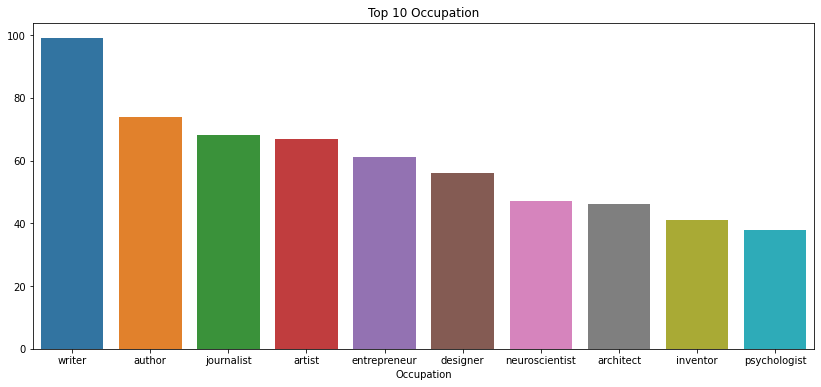

In [13]:
#plotting top 10 occupation
plt.figure(figsize=(14,6))
sns.barplot(x='index',y='occupation', data=df2)
plt.title('Top 10 Occupation')
plt.xlabel('Occupation')
plt.ylabel('')

* **Most of the speakers are writer followed by author and journalist**

##**Let's find top 5 most watched video**

In [14]:
#top 5 most viewed videos
popular_df=df[['speaker_1','views']].sort_values('views',ascending=False).head()
popular_df

,speaker_1,views
4,Sir Ken Robinson,65051954
1296,Amy Cuddy,57074270
2062,James Veitch,56932551
646,Simon Sinek,49730580
796,Brené Brown,47544833


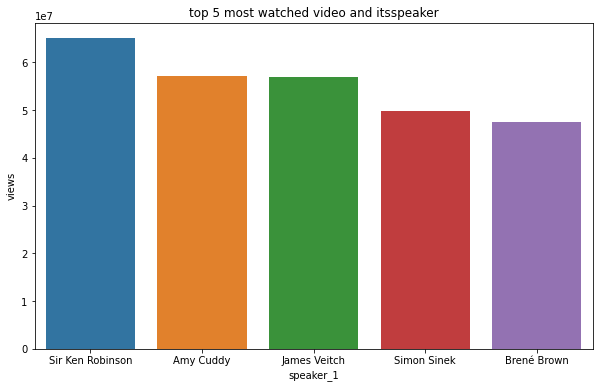

In [15]:
#finding Speaker's of most popular video
plt.figure(figsize=(10,6))
plt.title("top 5 most watched video and itsspeaker")
sns.barplot(x='speaker_1',y='views',data=popular_df)

* **Sir Ken Robinson's talk is the most popular TED Talk of with more than 65 million views.**
* **It is only talk that has crossed 60 million views**

**Most popular speaker**

In [16]:
#finding speaker from the dataset with maximum number of views
popular_speaker_df=df.groupby('speaker_1').sum()['views'].reset_index().sort_values('views',ascending=False).head(10)
popular_speaker_df

,speaker_1,views
104,Alex Gendler,117619583
2881,Sir Ken Robinson,84380518
1382,James Veitch,78843641
2875,Simon Sinek,62661183
441,Brené Brown,61285977
404,Bill Gates,57107176
173,Amy Cuddy,57074270
1655,Julian Treasure,54799681
1231,Hans Rosling,39871561
3085,Tim Urban,37976820


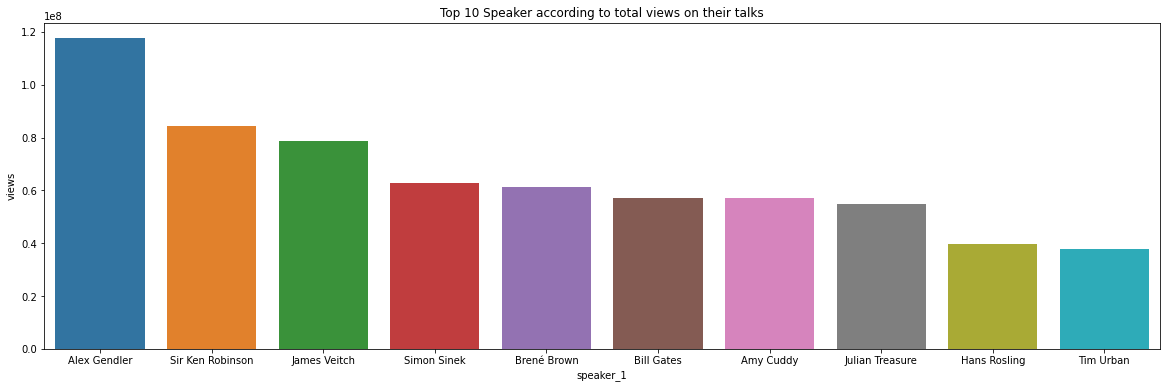

In [17]:
#printing most popular Speaker on the basis of total views on their talks
plt.figure(figsize=(20,6))
plt.title('Top 10 Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=popular_speaker_df)

* **Alex Gendler is the most popular speaker followed by Sir Ken Robinson**

## **Analysis on native_lang column**

In [18]:
#printing the value counts of native_lang column
df.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


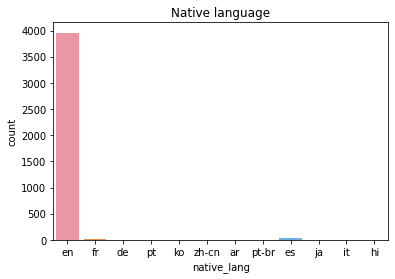

In [19]:
#plotting the countplot of native_lang column
plt.title('Native language')
sns.countplot(df['native_lang'])

* **Here, approx 99% values in native_lang column is en.**
* **So, this column will not impact much and of no use to us and we can simply remove it.**

In [20]:
#Dropping the native_lang column
df.drop(columns='native_lang',inplace=True)

## **Analysis on published_date column**

In [21]:
#applying strptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [22]:
#extracting release day, month and year from the published date column
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

**Extracted weekday, month and year from published_date column and added three separate columns as:**

* **release_day**
* **release_month**
* **release_year** 

In [23]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,duration,topics,related_talks,url,description,transcript,occupation,release_day,release_month,release_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,1,6,2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,1,6,2006
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,1,6,2006
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice,1,6,2006
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,1,6,2006


In [24]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

### **Analysis on release_day column.**
**Checking the most frequent release day of the week.** 

In [25]:
#checking the day of the month having maximum release date 
freq_rel_day=df[['release_day','views']].groupby('release_day').count()['views'].reset_index().sort_values('views',ascending=False)

Text(0.5, 1.0, 'Most frequent release days')

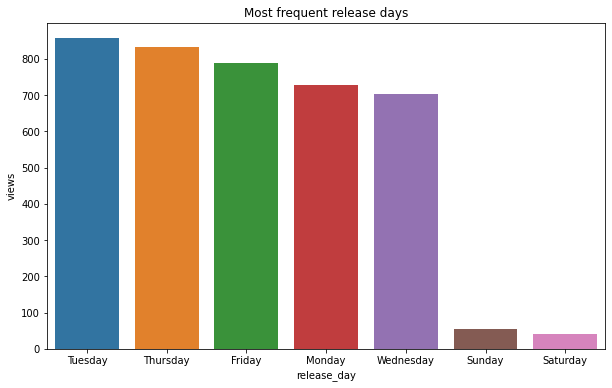

In [26]:
# plotting the day of the week having maximum release date 
plt.figure(figsize=(10,6))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

## **Analysis on release_month column**

In [27]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

Text(0.5, 1.0, 'Most frequent release months')

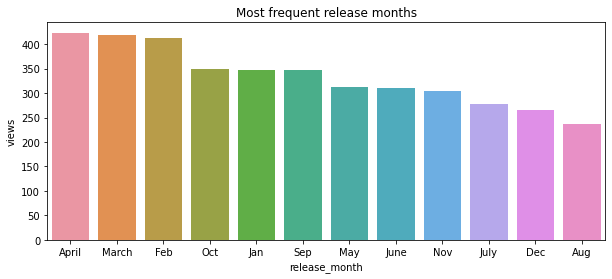

In [28]:
#checking months having maximum release 
freq_rel_month=df[['release_month','views']].groupby('release_month').count()['views'].reset_index().sort_values('views',ascending=False)

# plotting the months having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

**Most videos are released in April followed by March and Feb.**

## **Analysis on release_year column.**

Text(0.5, 1.0, 'Most frequent release years')

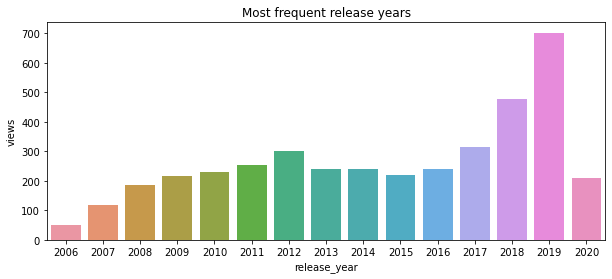

In [29]:
#checking years having maximum release 
freq_rel_year=df[['release_year','views']].groupby('release_year').count()['views'].reset_index().sort_values('views',ascending=False)

#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

* **2019 was the most frequent release year.**

## **Analysis on numerical features.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


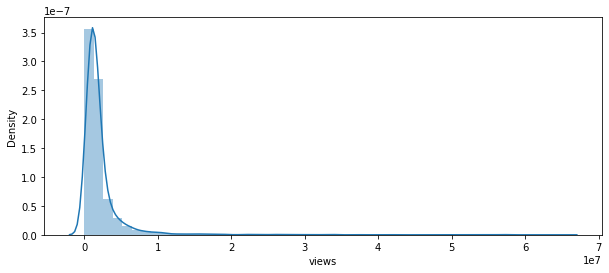

In [30]:
#plotting target variable
plt.figure(figsize=(10,4))
sns.distplot(df['views'])

* **Target variable is rightly skewed.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


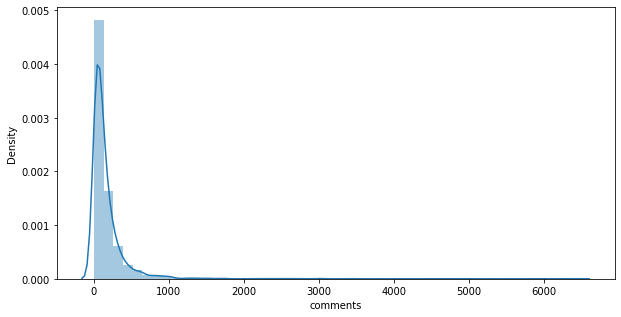

In [31]:
##plotting the distplot of comments
plt.figure(figsize=(10,5))
sns.distplot(df['comments'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


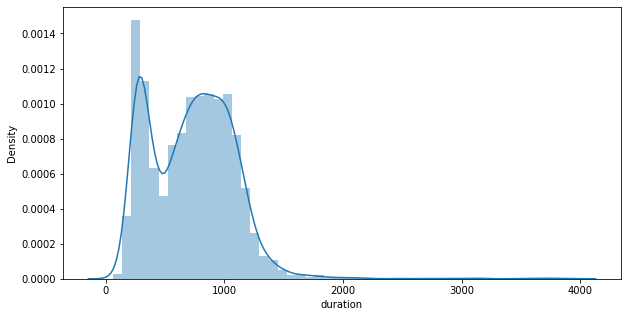

In [32]:
#plotting the distplot of duration
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

# **4.Feature Engineering**

In [33]:
len(df['speaker_1'].unique())

3274

In [34]:
#target encoding
#Doing target encoding on speaker_1 column
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)
df['speaker_1_avg_views']

0       2.190599e+06
1       3.987156e+06
2       2.156190e+06
3       1.979411e+06
4       2.812684e+07
            ...     
4000    8.569210e+05
4001    3.071870e+05
4002    4.644140e+05
4003    5.658200e+04
4004    0.000000e+00
Name: speaker_1_avg_views, Length: 4005, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


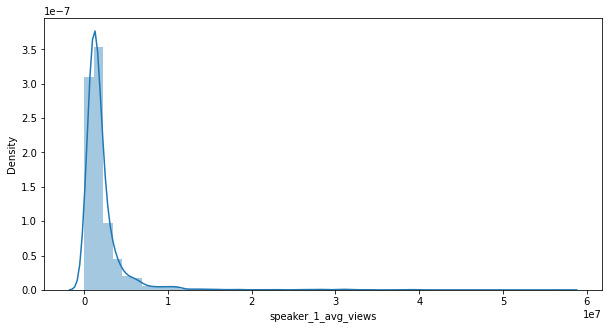

In [35]:
#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

In [36]:
#finding the unique events from the event column.
event_list=list(df.event.unique())
len(event_list)

459

In [37]:
#applying target encoding on event column
pop_event=df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
df['event_wise_avg_views']=df['event'].map(pop_event)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


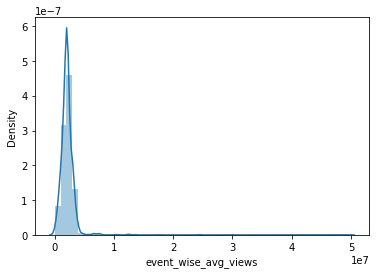

In [38]:
#Plotting the distplot of event_wise_avg_views
sns.distplot(df['event_wise_avg_views'])

## **Feature Engineering on available_lang column**
**In available_lang column we have a list of available languages for each video.**

In [39]:
#applying eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [40]:
len(df['available_lang'][0])

43

**Let's add a new feature which contain the count of total no of language for a particular video.**

In [41]:
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


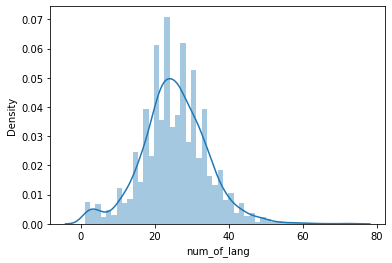

In [42]:
sns.distplot(df['num_of_lang'])

## **Feature Engineering on published_date column.**
**We can add a new column called video_age which is the difference of current year and published year.**

In [43]:
df['video_age']=2022-df['release_year']

##**Dropping the columns which has no effect on output.**

In [44]:
#dropping the url column
df=df.drop(columns=['url'])
#dropping the available_lang column
df.drop(columns='available_lang',inplace=True)
#dropping published_date columns
df=df.drop(columns='published_date')

In [45]:
#creating a copy of the dataframe
gf=df.copy()
df=gf.copy()

In [46]:
#displaying first 5 rows
pd.set_option('display.max_columns',None)
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,event,comments,duration,topics,related_talks,description,transcript,occupation,release_day,release_month,release_year,speaker_1_avg_views,event_wise_avg_views,num_of_lang,video_age
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,TED2006,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,2.190599e+06,3.876291e+06,43,16
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,TED2006,628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,Tuesday,June,2006,3.987156e+06,3.876291e+06,49,16
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,TED2006,124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,Tuesday,June,2006,2.156190e+06,3.876291e+06,26,16
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,TED2006,219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice,Tuesday,June,2006,1.979411e+06,3.876291e+06,35,16
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,TED2006,4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,Tuesday,June,2006,2.812684e+07,3.876291e+06,62,16


# **5. Data Cleaning.**
## **Outlier Treatment on numerical columns.**

In [47]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


about_speakers            0
all_speakers              0
comments                261
description               0
duration                 21
event                     0
event_wise_avg_views    156
num_of_lang             121
occupation                0
occupations               0
recorded_date             0
related_talks             0
release_day               0
release_month             0
release_year              0
speaker_1                 0
speaker_1_avg_views     373
talk_id                 119
title                     0
topics                    0
transcript                0
video_age                 0
views                   393
dtype: int64

* **We have outliers in few columns which needs to be treated well.**
* **I am replacing the outliers with the extreme values.**

In [48]:
# Replacing outliers with extreme values
for i in ['comments','duration','num_of_lang','views','speaker_1_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
 
  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [49]:
#Let's check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


about_speakers            0
all_speakers              0
comments                  0
description               0
duration                  0
event                     0
event_wise_avg_views      0
num_of_lang               0
occupation                0
occupations               0
recorded_date             0
related_talks             0
release_day               0
release_month             0
release_year              0
speaker_1                 0
speaker_1_avg_views       0
talk_id                 119
title                     0
topics                    0
transcript                0
video_age                 0
views                     0
dtype: int64

* **Now, we don't have any outliers.**

In [50]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'comments',
       'duration', 'topics', 'related_talks', 'description', 'transcript',
       'occupation', 'release_day', 'release_month', 'release_year',
       'speaker_1_avg_views', 'event_wise_avg_views', 'num_of_lang',
       'video_age'],
      dtype='object')

**Let's drop unimportant columns.**

In [51]:
#dropping unimportant columns from the dataframe.
df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations','event',
       'recorded_date','topics','related_talks','transcript','description','occupation','release_year','about_speakers'],inplace=True)

In [52]:
df.head()

,views,comments,duration,release_day,release_month,speaker_1_avg_views,event_wise_avg_views,num_of_lang,video_age
0,3523392.0,272.0,977.0,Tuesday,June,2190599.25,3.778944e+06,43.0,16
1,4009671.5,413.0,1190.0,Tuesday,June,3987156.10,3.778944e+06,47.5,16
2,1920832.0,124.0,1286.0,Tuesday,June,2156189.75,3.778944e+06,26.0,16
3,2664069.0,219.0,1116.0,Tuesday,June,1979411.00,3.778944e+06,35.0,16
4,4009671.5,413.0,1164.0,Tuesday,June,4129562.75,3.778944e+06,47.5,16


**Let's separate the dependent and independent variables.**

In [53]:
#separating the dependent and independent variables
y=df['views']
X=df.drop(columns='views')

In [54]:
X

,comments,duration,release_day,release_month,speaker_1_avg_views,event_wise_avg_views,num_of_lang,video_age
0,272.0,977.0,Tuesday,June,2190599.25,3.778944e+06,43.0,16
1,413.0,1190.0,Tuesday,June,3987156.10,3.778944e+06,47.5,16
2,124.0,1286.0,Tuesday,June,2156189.75,3.778944e+06,26.0,16
3,219.0,1116.0,Tuesday,June,1979411.00,3.778944e+06,35.0,16
4,413.0,1164.0,Tuesday,June,4129562.75,3.778944e+06,47.5,16
...,...,...,...,...,...,...,...,...
4000,6.0,690.0,Monday,April,856921.00,6.772082e+05,3.5,2
4001,NaN,346.0,Monday,April,307187.00,2.059996e+06,4.0,2
4002,9.0,774.0,Tuesday,April,464414.00,1.556845e+06,3.5,2
4003,NaN,257.0,Thursday,April,56582.00,2.059996e+06,3.5,2


**Doing one hot encoding using get_dummies function.**

In [55]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 25)

In [56]:
X.head()

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,video_age,release_day_Friday,release_day_Monday,release_day_Saturday,release_day_Sunday,release_day_Thursday,release_day_Tuesday,release_day_Wednesday,release_month_April,release_month_Aug,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,272.0,977.0,2190599.25,3.778944e+06,43.0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,47.5,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,124.0,1286.0,2156189.75,3.778944e+06,26.0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,219.0,1116.0,1979411.00,3.778944e+06,35.0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,413.0,1164.0,4129562.75,3.778944e+06,47.5,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


* **Now, we have around 25 features after one hot encoding.**
* **Applying proper feature selection is must here to get rid of unimportant features.**

## **Let's treat nan values of numerical columns using KNNImputer**

In [57]:
#checking for null values
X[['duration','comments']].isna().sum()

duration      0
comments    655
dtype: int64

* **Here, we have around 655 NaN values in comments column.**
* **Let's treat it using KNNImputer.**

In [58]:
#Taking features for using in KNNImputer
outlier_df=['duration','comments','speaker_1_avg_views',	'event_wise_avg_views']

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [60]:
# Before applying KNNImputer, we have to scale features so avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_df]))
# transform the dataset
X[outlier_df] = imputer.transform(scaler.fit_transform(X[outlier_df]))
#again applying inverse_transform on the data
X[outlier_df] = scaler.inverse_transform(X[outlier_df])

In [61]:
#let's check for nan values again
X[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

* **Now we don't have any nan values in comments column.**

In [62]:
X.head()

,comments,duration,speaker_1_avg_views,event_wise_avg_views,num_of_lang,video_age,release_day_Friday,release_day_Monday,release_day_Saturday,release_day_Sunday,release_day_Thursday,release_day_Tuesday,release_day_Wednesday,release_month_April,release_month_Aug,release_month_Dec,release_month_Feb,release_month_Jan,release_month_July,release_month_June,release_month_March,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,272.0,977.0,2190599.25,3.778944e+06,43.0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,413.0,1190.0,3987156.10,3.778944e+06,47.5,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,124.0,1286.0,2156189.75,3.778944e+06,26.0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,219.0,1116.0,1979411.00,3.778944e+06,35.0,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,413.0,1164.0,4129562.75,3.778944e+06,47.5,16,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# **6. Feature Selection**

In [63]:
#printing the shape of features
X.shape

(4005, 25)

## **Feature selection for numerical features using f_regression.**

In [64]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [65]:
#finding the f scores of each features
f_scores = f_regression(X, y)
f_scores

(array([1.56930257e+03, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        9.43117088e+02, 7.26280093e-01, 4.93457071e+01, 2.14095360e+00,
        1.69801520e+01, 1.32688878e+01, 4.22782469e+00, 1.54608611e+00,
        5.17596240e-03, 4.42937898e+00, 5.29481408e-01, 3.19042540e+00,
        9.10855944e-01, 3.61273001e+00, 1.59320065e+00, 7.00546927e-01,
        1.20164944e+01, 3.34840829e+00, 3.24993722e+00, 6.69041425e+00,
        1.59197663e+00]),
 array([7.27669071e-290, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        3.67017071e-186, 3.94142602e-001, 2.51061953e-012, 1.43491232e-001,
        3.85368618e-005, 2.73265521e-004, 3.98310726e-002, 2.13786984e-001,
        9.42649939e-001, 3.53875418e-002, 4.66867525e-001, 7.41463988e-002,
        3.39945041e-001, 5.74106856e-002, 2.06942978e-001, 4.02649944e-001,
        5.32863676e-004, 6.73443607e-002, 7.15013746e-002, 9.72823723e-003,
        2.07117470e-001]))

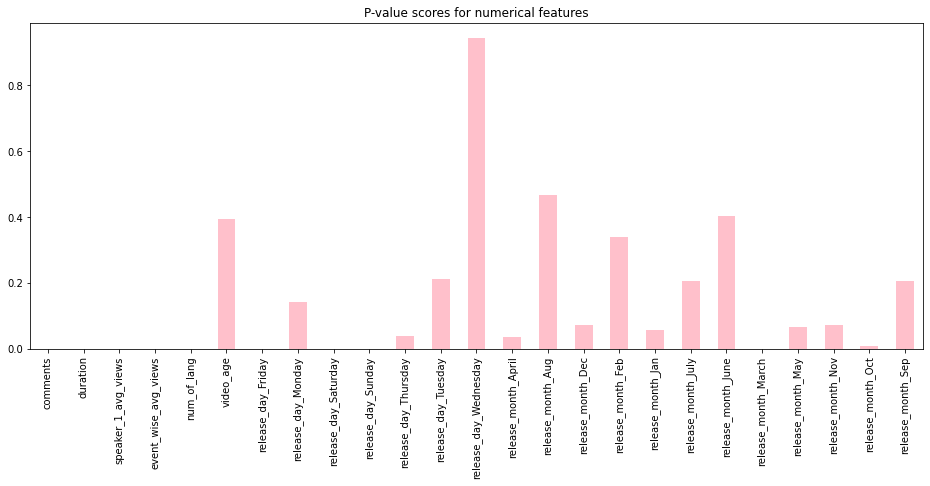

In [66]:
#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='pink',figsize=(16,6))
plt.title('P-value scores for numerical features')
plt.show()

* **From here using p value analysis we can drop those features having high p values.**

In [67]:
X.columns

Index(['comments', 'duration', 'speaker_1_avg_views', 'event_wise_avg_views',
       'num_of_lang', 'video_age', 'release_day_Friday', 'release_day_Monday',
       'release_day_Saturday', 'release_day_Sunday', 'release_day_Thursday',
       'release_day_Tuesday', 'release_day_Wednesday', 'release_month_April',
       'release_month_Aug', 'release_month_Dec', 'release_month_Feb',
       'release_month_Jan', 'release_month_July', 'release_month_June',
       'release_month_March', 'release_month_May', 'release_month_Nov',
       'release_month_Oct', 'release_month_Sep'],
      dtype='object')

In [68]:
#Let's take all the important features in a list.
ll=['comments', 'duration', 'num_of_lang', 
       'release_day_Friday','speaker_1_avg_views',	'event_wise_avg_views']
len(ll)

6

In [69]:
#let's take the important features
X=X[ll]

**Plotting the correlation matrix.**

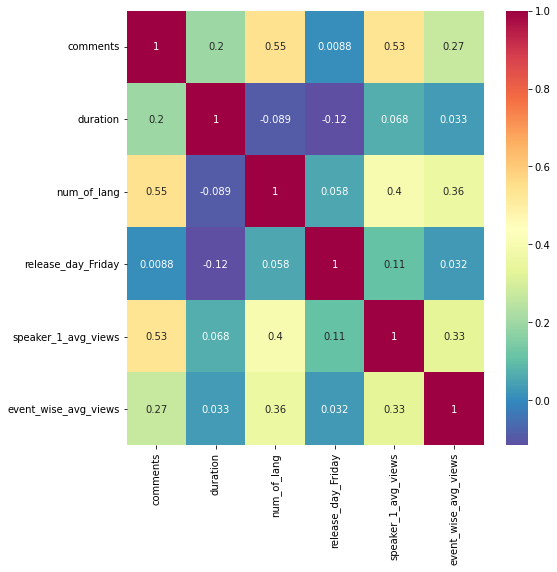

In [70]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

**Applying train test split**

In [71]:
from sklearn.model_selection import train_test_split, KFold

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **7. HyperParameter Tuning and modeling**

In [73]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [75]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
 
MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)
 
RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)
 
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE on test is 222175176405.42508
RMSE on test is 471354.6185256119
Training MAE: 268717.46
Test MAE: 262289.16


## **7.2 Random Forest Regressor**

In [76]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [77]:
from sklearn import metrics

In [78]:
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Training MAE: 96576.05
Test MAE: 231746.60
Target mean: 1661354.12
Target std: 1102595.71


* **It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.**

**Defining Parameter Dict for Hyperparameter Tuning**

In [79]:
#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

**1. Hyperparameter Tuning using Randomized Search CV**

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')
 
#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:4

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [82]:
#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_

In [83]:
rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=4, min_samples_leaf=30,
                      min_samples_split=50, n_estimators=120)

In [84]:
#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 204689.99
Test MAE: 212584.47


## **7.3 Applying XGboost regressor model**

In [85]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [86]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[08:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.2s
[08:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.1s
[08:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.1s
[08:04:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=6, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   0.1s
[08:04:29] WARNING: /worksp

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [87]:
#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_

In [88]:
xgb_optimal_model

XGBRegressor(max_depth=4, min_samples_leaf=50, min_samples_split=50,
             n_estimators=80)

In [89]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 169262.81
Test MAE: 220553.09


# **8. Comparison of different regressor Models**
## **The ML regressor models that we have used are :**
* Lasso Regressor
* Ridge Regressor
* KNearestNeighbors Regressor
* Random Forest Regressor
* XGB Regressor

**Let's try all these models together and store the scores in a new dataframe.**

In [90]:
from sklearn.linear_model import Ridge, Lasso
from sklearn import neighbors
import xgboost as xgb

In [94]:
#Defining all these models
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=4,min_samples_leaf=30,min_samples_split=50,n_estimators=120,random_state=42)],
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=50,
             min_samples_split=50, n_estimators=80)]          
        ]

In [95]:
#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[08:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Lasso:,268717.185695,262288.757920,0.812195,0.817135,477797.484675,471354.485835
1,Ridge:,268711.464451,262280.220163,0.812195,0.817138,477797.488634,471351.534800
2,KNeighborsRegressor:,203726.273279,239920.932280,0.864798,0.805532,405397.317943,486078.477742
3,RandomForest,203703.785753,210610.538512,0.805132,0.800267,486698.622559,492614.788850
4,XGBRegressor:,169262.805385,220553.085433,0.908343,0.835552,333788.787008,446989.161918


# **9. Final selection of the model**
### **We choose MAE and not RMSE as the deciding factor of our model selection because of the following reasons:**

* RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.

* MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.

* The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE.

# **10. Conclusion**
## **That's it! We reached the end of our exercise.**
### **Started with loading the data so far we have done EDA ,feature engineering , data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.**
**So far we have modelled on**
* Lasso Regressor
* Ridge Regressor
* KNearestNeighbors Regressor
* Random Forest Regressor
* XGB Regressor

**In all of these models our errors have been in the range of 2,00,000 which is around 5% of the average views. We have been able to correctly predict views 95% of the time.**

**After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing and reducing learning rate.**

**Given that only have 5% errors, our models have performed very well on unseen data due to various factors like feature selection,correct model selection,etc.**
**Out of all these models RandomForestRegressor is the best performer in terms of MAE.** 

**In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.**